### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import to_categorical

### Data Loading

***Loading test-set***

In [3]:
base_dir_test="input/Test"

In [4]:
class_labels=os.listdir(base_dir_test)
print(class_labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


In [5]:
test_data=[]
count=0

for label in class_labels:
    i=0
    path = os.path.join(base_dir_test, label)
    print(path)
    for img in os.listdir(path):
        try:
            image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(256,256))
            image=img_to_array(image)
            image=image/255.0
            test_data.append([image,count])
        except Exception as e:
                pass
    count=count+1

input/Test\Apple___Apple_scab
input/Test\Apple___Black_rot
input/Test\Apple___Cedar_apple_rust
input/Test\Apple___healthy


In [6]:
print(len(test_data))

500


In [7]:
x_test,Y_test =zip(*test_data)

In [8]:
x_test

(array([[[0.91764706, 0.88235295, 0.9490196 ],
         [0.7490196 , 0.7137255 , 0.78039217],
         [0.7176471 , 0.68235296, 0.7490196 ],
         ...,
         [0.13725491, 0.13333334, 0.20392157],
         [0.13725491, 0.13333334, 0.20392157],
         [0.13725491, 0.13333334, 0.20392157]],
 
        [[0.8117647 , 0.7764706 , 0.84313726],
         [0.76862746, 0.73333335, 0.8       ],
         [0.9411765 , 0.90588236, 0.972549  ],
         ...,
         [0.13333334, 0.12941177, 0.2       ],
         [0.13333334, 0.12941177, 0.2       ],
         [0.13333334, 0.12941177, 0.2       ]],
 
        [[0.83137256, 0.79607844, 0.8627451 ],
         [0.8509804 , 0.8156863 , 0.88235295],
         [0.7882353 , 0.7529412 , 0.81960785],
         ...,
         [0.14509805, 0.14117648, 0.21176471],
         [0.14509805, 0.14117648, 0.21176471],
         [0.14117648, 0.13725491, 0.20784314]],
 
        ...,
 
        [[0.11764706, 0.12941177, 0.20392157],
         [0.11764706, 0.12941177, 0.20392

In [9]:
print(Y_test)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

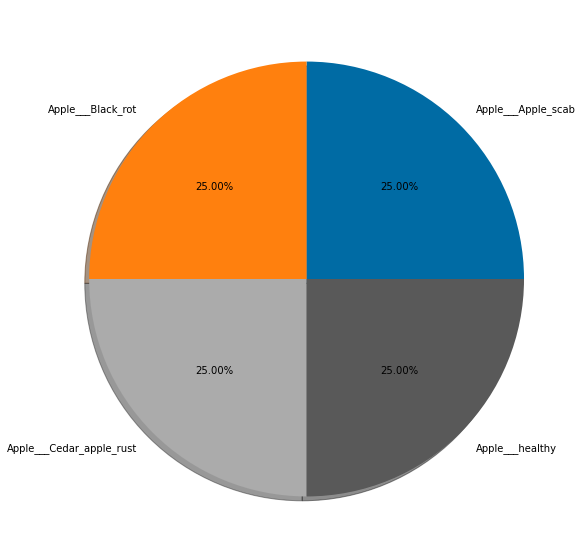

In [10]:
pie_data=[]
for i in range(len(class_labels)):
    pie_data.append(list(Y_test).count(i))
with plt.style.context('tableau-colorblind10'):
    plt.figure(figsize=(10,10))
    plt.pie(pie_data, labels=class_labels,autopct='%.2f%%',shadow=True)
    plt.show()

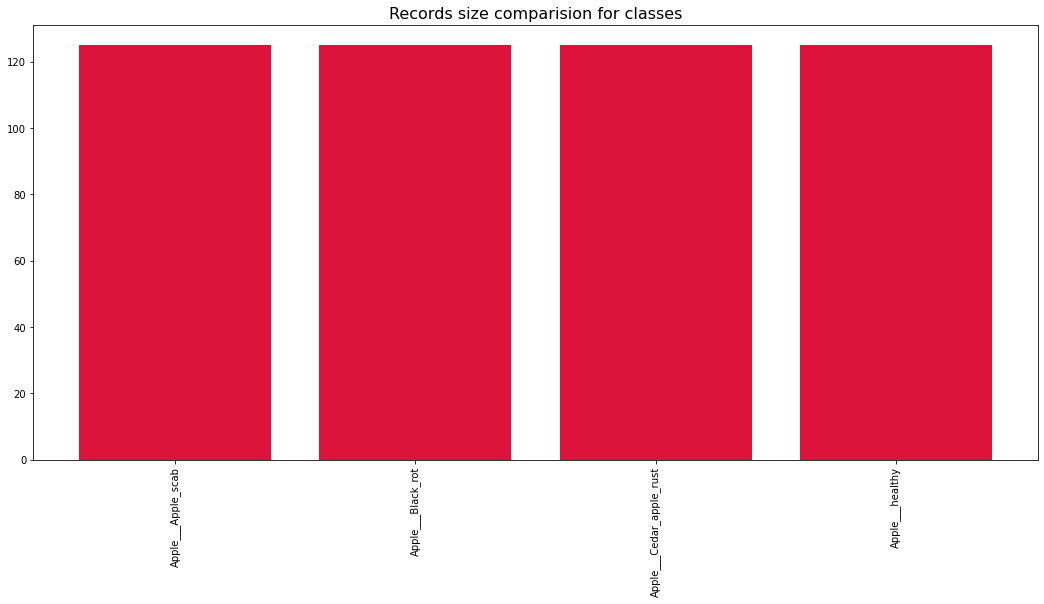

In [11]:
plt.figure(figsize=(18,8))
plt.bar(height=pie_data,x=class_labels,color="crimson")
plt.style.use("Solarize_Light2")
plt.title(label="Records size comparision for classes")
plt.xticks(rotation=90)
plt.show()

In [12]:
X_test=np.array(x_test)
y_test=np.array(Y_test)

In [13]:
print(X_test.shape,y_test.shape)

(500, 256, 256, 3) (500,)


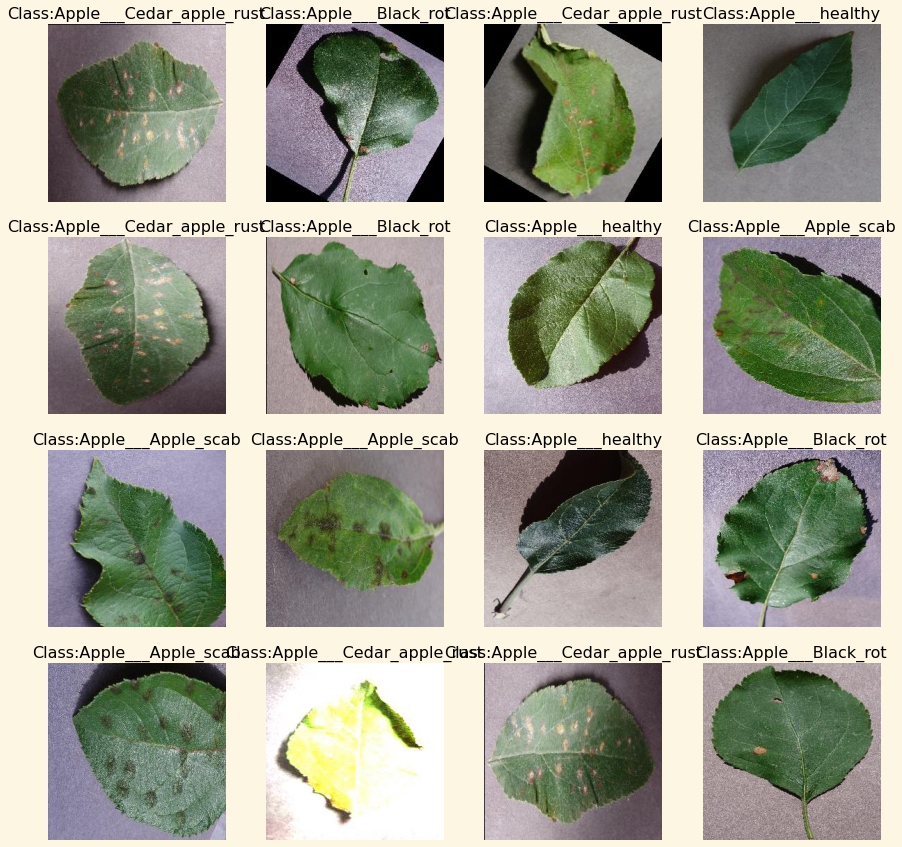

In [14]:
from random import randint
def show_images(X,y):
    labels =class_labels
    x,y = X,y
    plt.figure(figsize=(15, 15))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, X_test.shape[0]-1)
        plt.imshow(x[idx])
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
show_images(X_test,y_test)

***Loading train-set***

In [15]:
base_dir_train="input/Train"

In [16]:
class_labels=os.listdir(base_dir_train)
print(class_labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']


In [17]:
train_data=[]
count=0

for label in class_labels:
    i=0
    path = os.path.join(base_dir_train, label)
    print(path)
    for img in os.listdir(path):
        try:
            image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(256,256))
            image=img_to_array(image)
            image=image/255.0
            train_data.append([image,count])
        except Exception as e:
                pass
    count=count+1

input/Train\Apple___Apple_scab
input/Train\Apple___Black_rot
input/Train\Apple___Cedar_apple_rust
input/Train\Apple___healthy


In [18]:
print(len(train_data))

2411


In [19]:
x_train,Y_train =zip(*train_data)

In [20]:
x_train

(array([[[0.654902  , 0.6392157 , 0.76862746],
         [0.6509804 , 0.63529414, 0.7647059 ],
         [0.64705884, 0.6313726 , 0.7607843 ],
         ...,
         [0.7254902 , 0.7137255 , 0.827451  ],
         [0.7176471 , 0.7058824 , 0.81960785],
         [0.70980394, 0.69803923, 0.8117647 ]],
 
        [[0.6666667 , 0.6509804 , 0.78039217],
         [0.6627451 , 0.64705884, 0.7764706 ],
         [0.65882355, 0.6431373 , 0.77254903],
         ...,
         [0.7294118 , 0.7176471 , 0.83137256],
         [0.72156864, 0.70980394, 0.8235294 ],
         [0.7176471 , 0.7058824 , 0.81960785]],
 
        [[0.6666667 , 0.6509804 , 0.78039217],
         [0.6627451 , 0.64705884, 0.7764706 ],
         [0.65882355, 0.6431373 , 0.77254903],
         ...,
         [0.7372549 , 0.7254902 , 0.8392157 ],
         [0.7294118 , 0.7176471 , 0.83137256],
         [0.7254902 , 0.7137255 , 0.827451  ]],
 
        ...,
 
        [[0.39215687, 0.3529412 , 0.4862745 ],
         [0.4       , 0.36078432, 0.49411

In [21]:
print(Y_train)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [22]:
X_train=np.array(x_train)
y_train=np.array(Y_train)

In [23]:
print(X_train.shape,y_train.shape)

(2411, 256, 256, 3) (2411,)


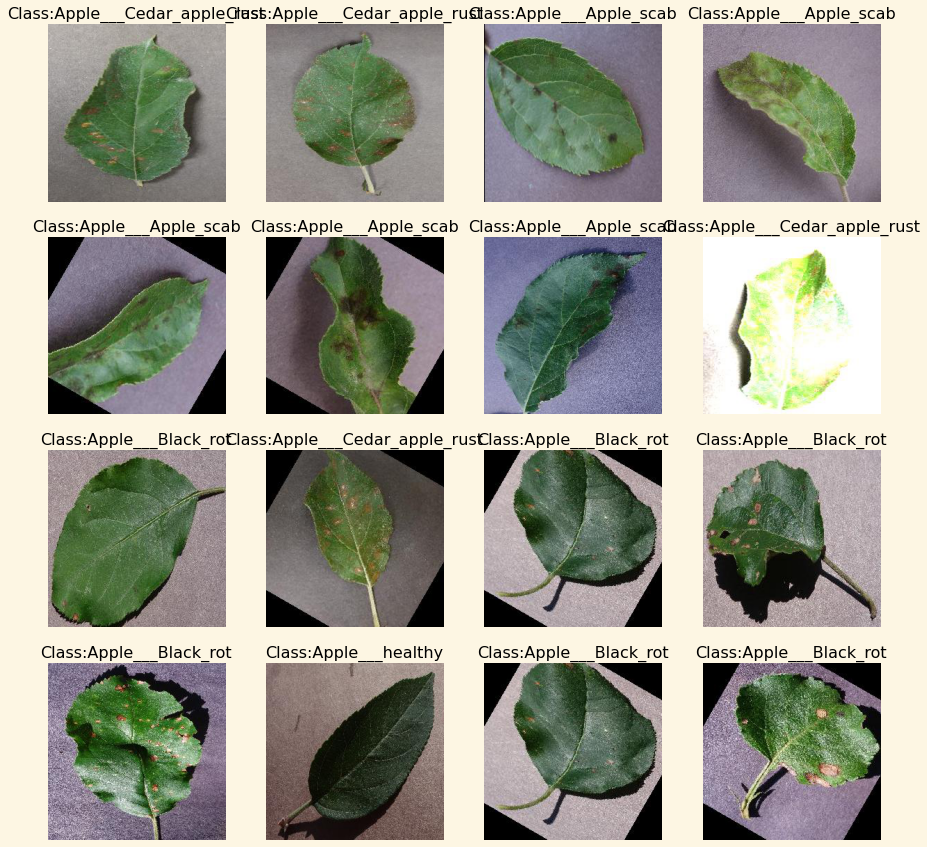

In [24]:
from random import randint
def show_images(X,y):
    labels =class_labels
    x,y = X,y
    plt.figure(figsize=(15, 15))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, X_train.shape[0]-1)
        plt.imshow(x[idx])
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))
show_images(X_train,y_train)

### Algorithm -DenseNet_201

In [25]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [26]:
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import Adam

In [27]:
densenet_model=tf.keras.applications.DenseNet201(include_top=False,
                                                   weights="imagenet",
                                                   input_tensor=None,
                                                   input_shape=(256,256,3),
                                                   pooling="max",
                                                   classes=1000)
densenet_model.trainable = False

In [28]:
inputs = densenet_model.input
m = tf.keras.layers.Dense(512, activation='relu')(densenet_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(m)
dense_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [29]:
dense_model.compile(optimizer=Adam(learning_rate=1e-3,decay=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
dense_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 64, 64, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 64, 64, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 64, 64, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 32, 32, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 32, 32, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 32, 32, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 32, 32, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 32, 32, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 32, 32, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 32, 32, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 16, 16, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 16, 16, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 16, 16, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 16, 16, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 16, 16, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 16, 16, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 16, 16, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 16, 16, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 16, 16, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 16, 16, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 16, 16, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 16, 16, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 16, 16, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 16, 16, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 16, 16, 1024  4096       ['conv4_block24_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 16, 16, 1024  0          ['conv4_block25_0_bn[0][0]']     
 on)      

 lization)                      )                                                                 
                                                                                                  
 conv4_block29_0_relu (Activati  (None, 16, 16, 1152  0          ['conv4_block29_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 16, 16, 128)  147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block33_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv4_block33_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_1_relu (Activati  (None, 16, 16, 128)  0          ['conv4_block33_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block33_1_relu[0][0]']   
                                                                                                  
 conv4_block33_concat (Concaten  (None, 16, 16, 1312  0          ['conv4_block32_concat[0][0]',   
 ate)                           )                                 'conv4_block33_2_conv[0][0]']   
          

                                                                                                  
 conv4_block37_concat (Concaten  (None, 16, 16, 1440  0          ['conv4_block36_concat[0][0]',   
 ate)                           )                                 'conv4_block37_2_conv[0][0]']   
                                                                                                  
 conv4_block38_0_bn (BatchNorma  (None, 16, 16, 1440  5760       ['conv4_block37_concat[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 conv4_block38_0_relu (Activati  (None, 16, 16, 1440  0          ['conv4_block38_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_blo

 conv4_block42_0_relu (Activati  (None, 16, 16, 1568  0          ['conv4_block42_0_bn[0][0]']     
 on)                            )                                                                 
                                                                                                  
 conv4_block42_1_conv (Conv2D)  (None, 16, 16, 128)  200704      ['conv4_block42_0_relu[0][0]']   
                                                                                                  
 conv4_block42_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv4_block42_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block42_1_relu (Activati  (None, 16, 16, 128)  0          ['conv4_block42_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block46_1_relu (Activati  (None, 16, 16, 128)  0          ['conv4_block46_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block46_2_conv (Conv2D)  (None, 16, 16, 32)   36864       ['conv4_block46_1_relu[0][0]']   
                                                                                                  
 conv4_block46_concat (Concaten  (None, 16, 16, 1728  0          ['conv4_block45_concat[0][0]',   
 ate)                           )                                 'conv4_block46_2_conv[0][0]']   
                                                                                                  
 conv4_block47_0_bn (BatchNorma  (None, 16, 16, 1728  6912       ['conv4_block46_concat[0][0]']   
 lization)

                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_concat (Concatena  (None, 8, 8, 960)   0           ['conv5_block1_concat[0][0]',    
 te)      

 conv5_block6_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv5_block6_1_relu[0][0]']    
                                                                                                  
 conv5_block6_concat (Concatena  (None, 8, 8, 1088)  0           ['conv5_block5_concat[0][0]',    
 te)                                                              'conv5_block6_2_conv[0][0]']    
                                                                                                  
 conv5_block7_0_bn (BatchNormal  (None, 8, 8, 1088)  4352        ['conv5_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block7_0_relu (Activatio  (None, 8, 8, 1088)  0           ['conv5_block7_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv5_block11_0_relu (Activati  (None, 8, 8, 1216)  0           ['conv5_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block11_1_conv (Conv2D)  (None, 8, 8, 128)    155648      ['conv5_block11_0_relu[0][0]']   
                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv5_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block11_1_relu (Activati  (None, 8, 8, 128)   0           ['conv5_block11_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv5_block15_1_relu (Activati  (None, 8, 8, 128)   0           ['conv5_block15_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block15_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv5_block15_1_relu[0][0]']   
                                                                                                  
 conv5_block15_concat (Concaten  (None, 8, 8, 1376)  0           ['conv5_block14_concat[0][0]',   
 ate)                                                             'conv5_block15_2_conv[0][0]']   
                                                                                                  
 conv5_blo

 conv5_block19_concat (Concaten  (None, 8, 8, 1504)  0           ['conv5_block18_concat[0][0]',   
 ate)                                                             'conv5_block19_2_conv[0][0]']   
                                                                                                  
 conv5_block20_0_bn (BatchNorma  (None, 8, 8, 1504)  6016        ['conv5_block19_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block20_0_relu (Activati  (None, 8, 8, 1504)  0           ['conv5_block20_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block20_1_conv (Conv2D)  (None, 8, 8, 128)    192512      ['conv5_block20_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv5_block24_1_conv (Conv2D)  (None, 8, 8, 128)    208896      ['conv5_block24_0_relu[0][0]']   
                                                                                                  
 conv5_block24_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv5_block24_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block24_1_relu (Activati  (None, 8, 8, 128)   0           ['conv5_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_blo

 conv5_block28_1_relu (Activati  (None, 8, 8, 128)   0           ['conv5_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block28_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv5_block28_1_relu[0][0]']   
                                                                                                  
 conv5_block28_concat (Concaten  (None, 8, 8, 1792)  0           ['conv5_block27_concat[0][0]',   
 ate)                                                             'conv5_block28_2_conv[0][0]']   
                                                                                                  
 conv5_block29_0_bn (BatchNorma  (None, 8, 8, 1792)  7168        ['conv5_block28_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 bn (BatchNormalization)        (None, 8, 8, 1920)   7680        ['conv5_block32_concat[0][0]']   
                                                                                                  
 relu (Activation)              (None, 8, 8, 1920)   0           ['bn[0][0]']                     
                                                                                                  
 max_pool (GlobalMaxPooling2D)  (None, 1920)         0           ['relu[0][0]']                   
                                                                                                  
 dense (Dense)                  (None, 512)          983552      ['max_pool[0][0]']               
                                                                                                  
 dense_1 (Dense)                (None, 4)            2052        ['dense[0][0]']                  
          

In [ ]:
history = dense_model.fit(X_train, y_train, batch_size=64,validation_data = (X_test, y_test),epochs=10)

Epoch 1/10
38/38 [==============================] - 556s 14s/step - loss: 2.1385 - accuracy: 0.6636 - val_loss: 0.2907 - val_accuracy: 0.9080
Epoch 2/10
38/38 [==============================] - 516s 14s/step - loss: 0.1402 - accuracy: 0.9531 - val_loss: 0.1532 - val_accuracy: 0.9500
Epoch 3/10
38/38 [==============================] - 539s 14s/step - loss: 0.0680 - accuracy: 0.9805 - val_loss: 0.1525 - val_accuracy: 0.9600
Epoch 4/10
38/38 [==============================] - 519s 14s/step - loss: 0.0455 - accuracy: 0.9909 - val_loss: 0.1078 - val_accuracy: 0.9560
Epoch 5/10
38/38 [==============================] - ETA: 0s - loss: 0.0305 - accuracy: 0.9963 

### Accuracy and Loss plot-graphs

In [ ]:
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(18,8))
    plt.rcParams["font.size"]=15
    plt.plot(history.history["accuracy"],label="accuracy")
    plt.plot(history.history["val_accuracy"],label="val_accuracy")
    plt.title(label="Accuracy and Val_accuracy plot-graphs")
    plt.legend()
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history.history["loss"],label="loss")
    plt.plot(history.history["val_loss"],label="val_loss")
    plt.title(label="Loss and Val_loss plot-graphs")
    plt.legend()
    plt.show()

In [ ]:
dense_model_prediction=dense_model.predict(X_test,batch_size=64,verbose=1)

In [ ]:
print(dense_model_prediction)

In [ ]:
dense_model_labels=[]
for i in range(len(dense_model_prediction)):
    dense_model_labels.append(np.argmax(dense_model_prediction[i]))

In [ ]:
print(dense_model_labels)

In [ ]:
true_labels=[]
for i in range(len(y_test)):
    true_labels.append(np.argmax(y_test[i]))

In [ ]:
print(true_labels)

### Result Analysis

***Accuracy Score***

In [ ]:
dense_accuracy=accuracy_score(y_true=true_labels,y_pred=dense_model_labels)
print("DenseNet201 model's validated accuracy is {:.2f}%".format(dense_accuracy*100.0))

***Classification Report***

In [ ]:
print(classification_report(y_true=true_labels,y_pred=dense_model_labels,target_names=class_labels))

***Confusion Matrix***

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_true=true_labels,y_pred=dense_model_labels),
                        figsize=(10,5),
                        class_names=class_labels,
                        cmap=plt.cm.Reds)
plt.title(label="Densenet201 Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

***Model Saving***

In [ ]:
dense_model.save(filepath="models/DenseNet201_model.h5")